In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [47]:
#Importation des bibliothèques
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [48]:
# URL de la page à scraper
url = "https://www.footmercato.net/tunisie/ligue-1-pro/classement"

# Requête HTTP (penser à simuler un navigateur pour éviter le blocage)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112 Safari/537.36"
}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Trouver le tableau du classement
table = soup.find("table")
rows = table.find_all("tr")

# Extraction des données
data = []
for row in rows[1:]:  # Ignorer l'en-tête
    cols = row.find_all("td")
    if len(cols) >= 10:
        position = cols[0].text.strip()
        team = cols[1].text.strip()
        Points = cols[2].text.strip()
        Matchs = cols[3].text.strip()
        DiffG = cols[4].text.strip()
        Wins = cols[5].text.strip()
        Draws = cols[6].text.strip()
        Loses = cols[7].text.strip()
        GS = cols[8].text.strip()
        GC = cols[9].text.strip()
        data.append([
            position, team, Points, Matchs, DiffG, Wins,
            Draws, Loses, GS,GC
        ])

# Créer un DataFrame
df = pd.DataFrame(data, columns=[
    "Position", "Team", "Points", "Matchs", "DiffG", "Wins",
    "Draws", "Loses", "GS","GC"
])

# Afficher
print(df)

#COLUMNS:
    # DiffG:différence entre buts marqués et buts encaissés
    # Diff_goals:différence entre buts marqués et buts encaissés
    #GS(Goals Scored): buts marqués
    #GC(Goals Conceded): buts encaissés


   Position            Team Points Matchs DiffG Wins Draws Loses  GS  GC
0         1           Tunis     59     27   +29   17     8     2  51  22
1         2        Monastir     59     27   +31   17     8     2  41  10
2         3        ES Sahel     57     27   +20   18     3     6  42  22
3         4   Club Africain     55     27   +20   16     7     4  36  16
4         5             ESZ     50     27    +9   15     5     7  33  24
5         6  Stade Tunisien     45     27    +8   12     9     6  27  19
6         7            Sfax     38     27   +11    9    11     7  29  18
7         8        Métlaoui     36     27    +1    9     9     9  26  25
8         9        Bizertin     29     27    -2    7     8    12  25  27
9        10  Olympique Béja     29     27    -8    7     8    12  19  27
10       11            USBG     26     27    -6    5    11    11  23  29
11       12             ASG     23     27   -19    6     5    16  19  38
12       13         Soliman     22     27   -26    

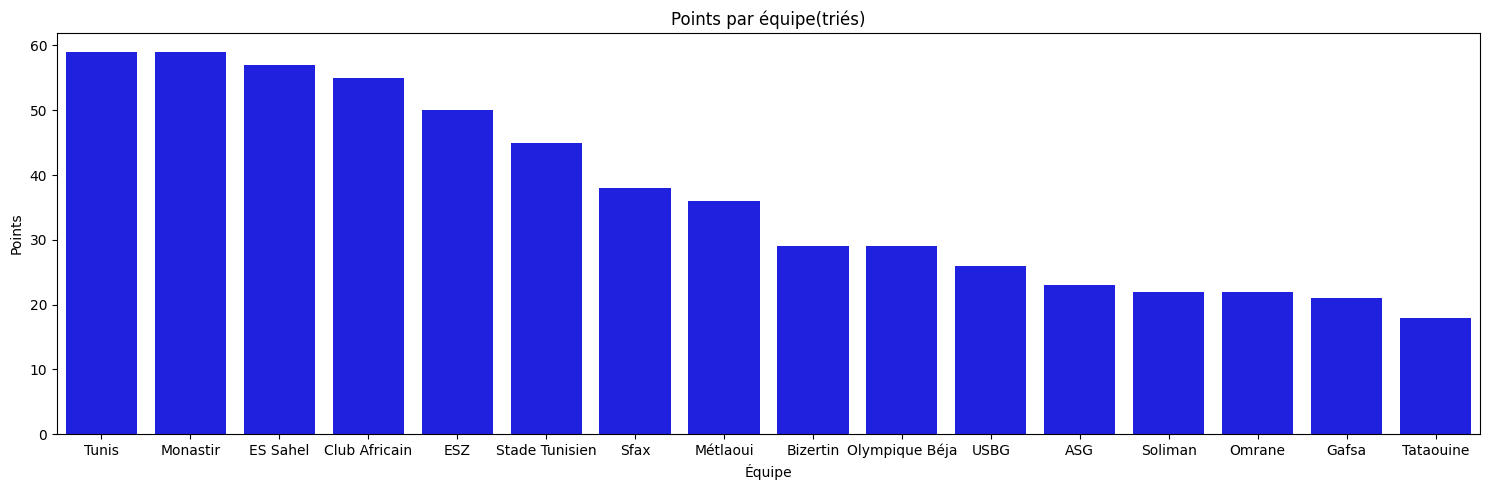

In [49]:
# S'assurer que les points sont bien numériques
df["Points"] = pd.to_numeric(df["Points"])

# Histogramme
plt.figure(figsize=(15,5))
sns.barplot(x="Team", y="Points", data=df.sort_values("Points", ascending=False),color="blue")
plt.title("Points par équipe(triés)")
plt.xlabel("Équipe")
plt.ylabel("Points")
plt.tight_layout()
plt.show()


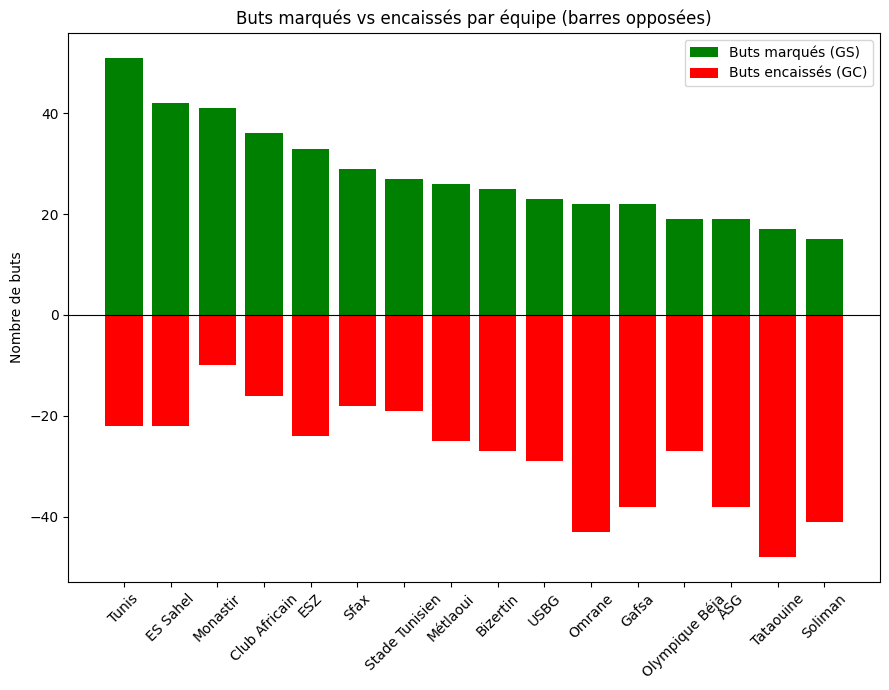

In [50]:
# S'assurer que BP et BC sont bien numériques
df["GS"] = pd.to_numeric(df["GS"])
df["GC"] = pd.to_numeric(df["GC"])

# Trier les équipes pour l'affichage (optionnel)
df_sorted = df.sort_values("GS", ascending=False)
teams = df_sorted["Team"]
bp = df_sorted["GS"]
bc = -df_sorted["GC"]  # Valeurs négatives pour être en bas

x = range(len(teams))

plt.figure(figsize=(9,7))
plt.bar(x, bp, color="green", label="Buts marqués (GS)")
plt.bar(x, bc, color="red", label="Buts encaissés (GC)")
plt.axhline(0, color="black", linewidth=0.8)

# Étiquettes des équipes sur l'axe des x
plt.xticks(x, teams, rotation=45)
plt.ylabel("Nombre de buts")
plt.title("Buts marqués vs encaissés par équipe (barres opposées)")
plt.legend()
plt.tight_layout()
plt.show()


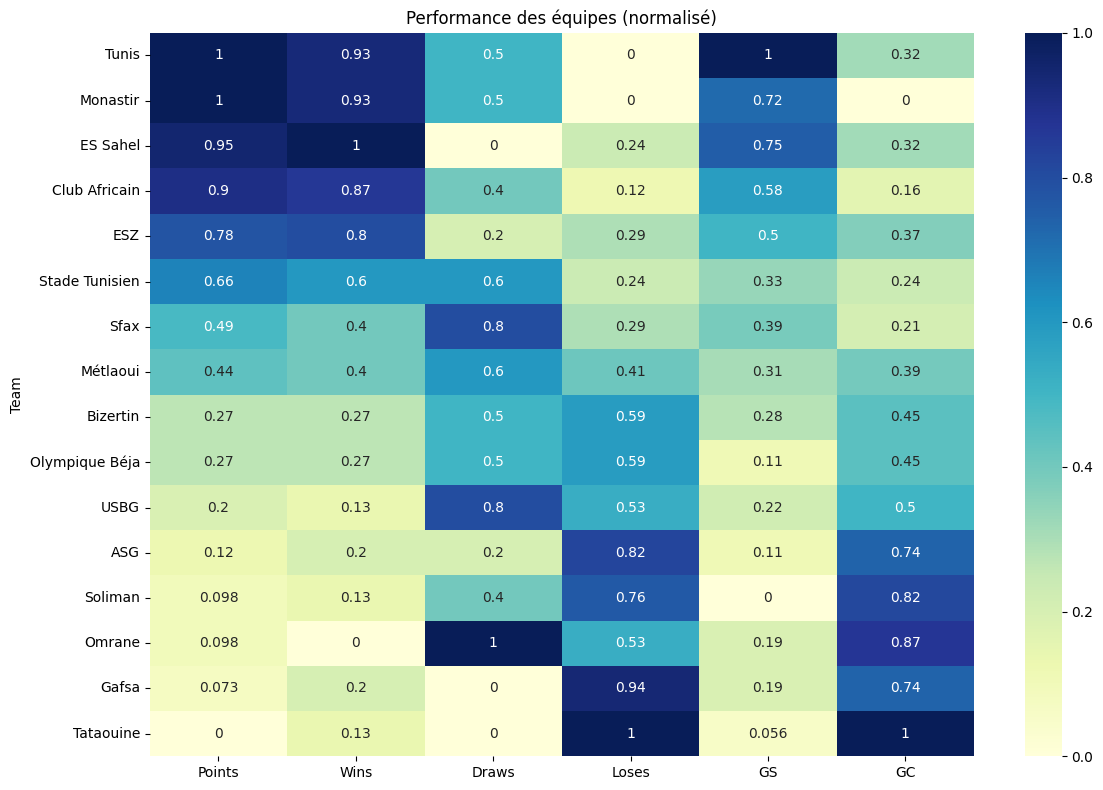

In [51]:
# S’assurer que toutes les colonnes sont bien numériques
cols = ["Points", "Wins", "Draws", "Loses", "GS", "GC"]
df[cols] = df[cols].apply(pd.to_numeric)

# Normalisation:
data_norm = df.set_index("Team")[cols].copy()
data_norm = (data_norm - data_norm.min()) / (data_norm.max() - data_norm.min())

plt.figure(figsize=(12,8))
sns.heatmap(data_norm, annot=True, cmap="YlGnBu", cbar=True)
plt.title("Performance des équipes (normalisé)")
plt.tight_layout()
plt.show()



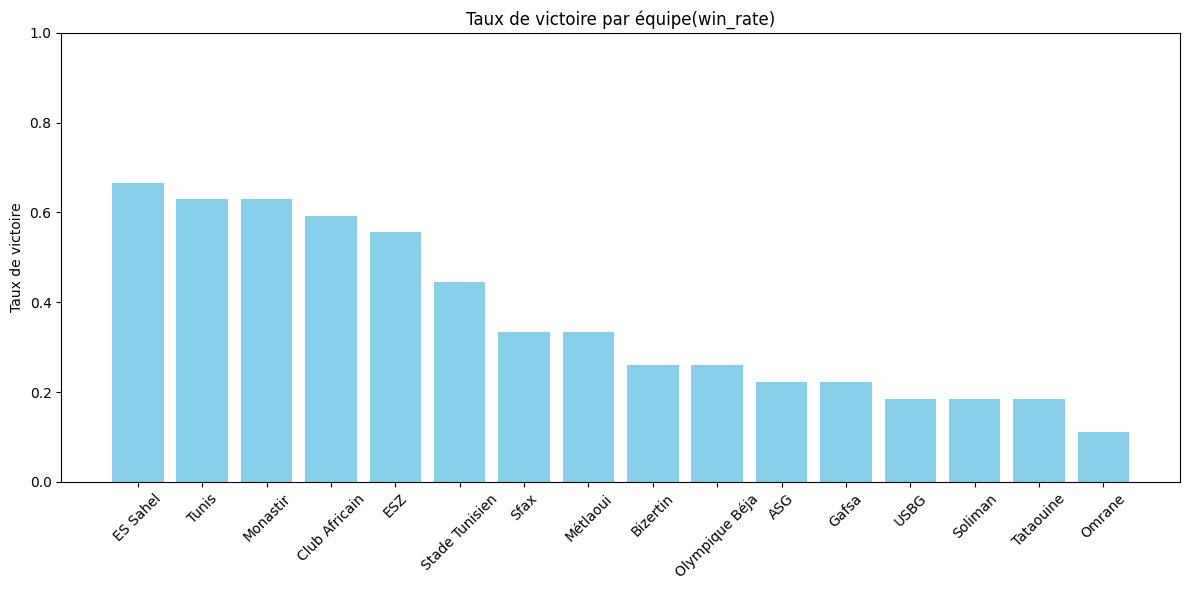

In [54]:
df["Matchs"] = pd.to_numeric(df["Matchs"])
df["Wins"] = pd.to_numeric(df["Wins"])
df["Win_Rate"] = df["Wins"] / df["Matchs"]
df_sorted = df.sort_values("Win_Rate", ascending=False)

# Créer le graphique
plt.figure(figsize=(12,6))
plt.bar(df_sorted["Team"], df_sorted["Win_Rate"], color="skyblue")
plt.ylabel("Taux de victoire")
plt.ylim(0, 1)  # Les taux sont entre 0 et 1
plt.title("Taux de victoire par équipe(win_rate)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [53]:
# Convertir les colonnes en numériques 
df["GS"] = pd.to_numeric(df["GS"])
df["GC"] = pd.to_numeric(df["GC"])

# Meilleures attaques
best_attacks = df.sort_values(by="GS", ascending=False)
print("Top 5 attaques :")
print(best_attacks[["Position","Team", "GS"]].head(5))

# Meilleures défenses
best_defenses = df.sort_values(by="GC", ascending=True)
print("\nTop 5 défenses :")
print(best_defenses[["Position","Team", "GC"]].head(5))


Top 5 attaques :
  Position           Team  GS
0        1          Tunis  51
2        3       ES Sahel  42
1        2       Monastir  41
3        4  Club Africain  36
4        5            ESZ  33

Top 5 défenses :
  Position            Team  GC
1        2        Monastir  10
3        4   Club Africain  16
6        7            Sfax  18
5        6  Stade Tunisien  19
0        1           Tunis  22


In [11]:
df["Loses"] = pd.to_numeric(df["Loses"])
print("\n Top 3 équipes en mauvaises états :")
print(df.sort_values("Points")[["Team", "Points", "GS", "Loses"]].head(3))



 Top 3 équipes en mauvaises états :
         Team  Points  GS  Loses
15  Tataouine      18  17     19
14      Gafsa      21  22     18
12    Soliman      22  15     15


In [38]:
first_two_teams = df[['Team', 'Points','GS','GC']].head(2)
print("Les équipes qui vont jouer au Champions League CAF :")
print(first_two_teams)

Les équipes qui vont jouer au Champions League CAF :
       Team  Points  GS  GC
0     Tunis      59  51  22
1  Monastir      59  41  10


In [40]:
last_two_teams = df[['Team', 'Points','GS','GC']].tail(2)
print("Les équipes qui risquent de jouer la prochaine saison :")
print(last_two_teams)

Les équipes qui risquent de jouer la prochaine saison :
         Team  Points  GS  GC
14      Gafsa      21  22  38
15  Tataouine      18  17  48


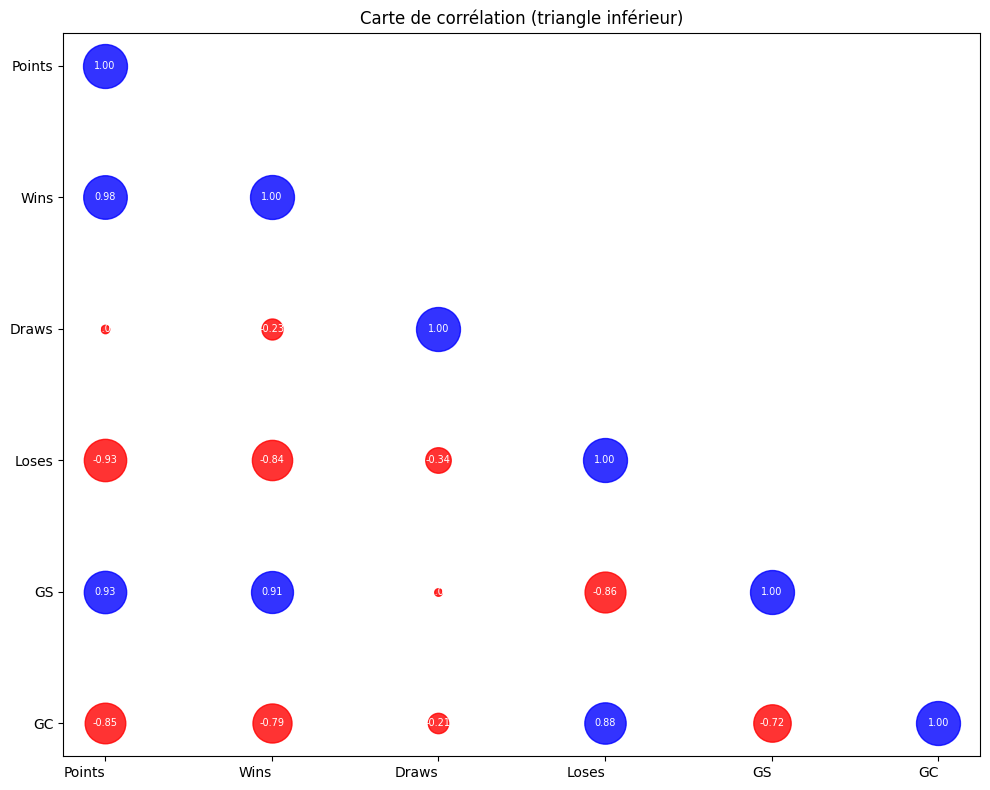

In [46]:
# Matrice de corrélation
numerics = ["Points", "Wins", "Draws", "Loses", "GS", "GC"]
df[numerics] = df[numerics].apply(pd.to_numeric, errors='coerce')
corr = df[numerics].corr()

# Création de la figure
fig, ax = plt.subplots(figsize=(10, 8))

# Dessin des cercles uniquement dans le triangle inférieur
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        if i >= j:  # Triangle inférieur uniquement
            coef = corr.iloc[i, j]
            size = abs(coef) * 1000
            color = 'red' if coef < 0 else 'blue'
            ax.scatter(j, i, s=size, color=color, alpha=0.8)
            ax.text(j, i, f"{coef:.2f}", ha='center', va='center', color='white', fontsize=7)

# Réglages des axes
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=0, ha="right")
ax.set_yticklabels(corr.columns)
ax.set_title("Carte de corrélation (triangle inférieur)")
ax.invert_yaxis()
plt.tight_layout()
plt.show()


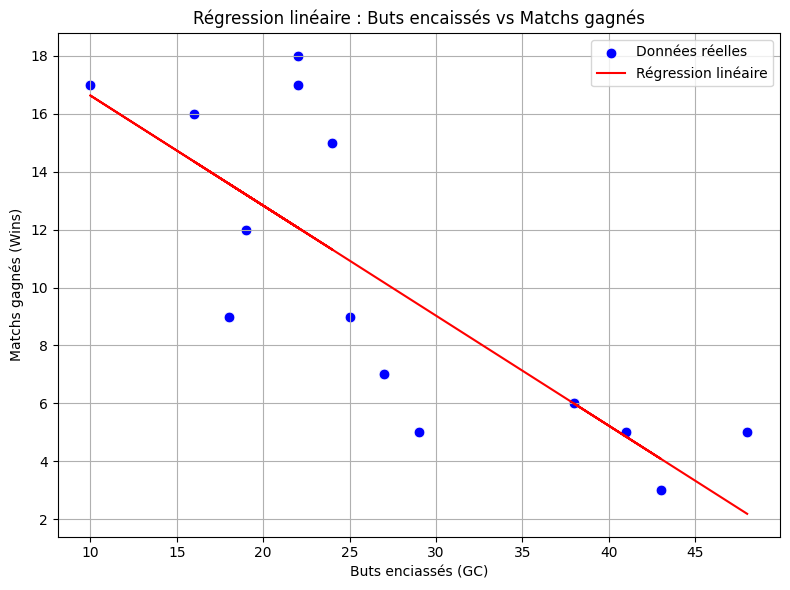

Coefficient de régression : -0.38
Intercept : 20.43


In [18]:

# Suppression des lignes avec valeurs manquantes
df_clean = df.dropna(subset=["GC", "Wins"])

# Définition des variables
X = df_clean[["GC"]]
y = df_clean["Wins"]

# Régression linéaire
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Affichage des résultats
plt.figure(figsize=(8, 6))
sns.scatterplot(x="GC", y="Wins", data=df_clean, color="blue", s=60, label="Données réelles")
plt.plot(df_clean["GC"], y_pred, color="red", label="Régression linéaire")
plt.xlabel("Buts enciassés (GC)")
plt.ylabel("Matchs gagnés (Wins)")
plt.title("Régression linéaire : Buts encaissés vs Matchs gagnés")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage des coefficients
print(f"Coefficient de régression : {model.coef_[0]:.2f}")
print(f"Intercept : {model.intercept_:.2f}")

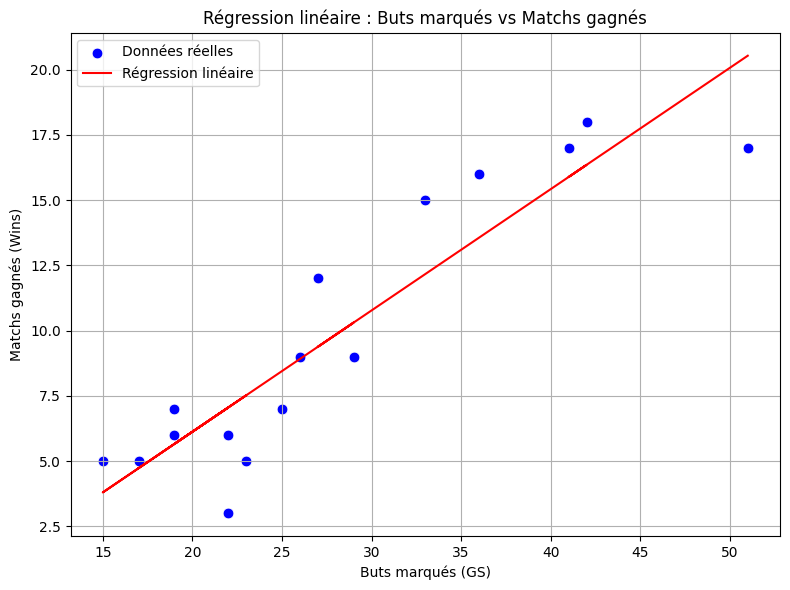

Coefficient de régression : 0.46
Intercept : -3.17


In [17]:
# Suppression des lignes avec valeurs manquantes
df_clean = df.dropna(subset=["GS", "Wins"])

# Définition des variables
X = df_clean[["GS"]]
y = df_clean["Wins"]

# Régression linéaire
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Affichage des résultats
plt.figure(figsize=(8, 6))
sns.scatterplot(x="GS", y="Wins", data=df_clean, color="blue", s=60, label="Données réelles")
plt.plot(df_clean["GS"], y_pred, color="red", label="Régression linéaire")
plt.xlabel("Buts marqués (GS)")
plt.ylabel("Matchs gagnés (Wins)")
plt.title("Régression linéaire : Buts marqués vs Matchs gagnés")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Affichage des coefficients
print(f"Coefficient de régression : {model.coef_[0]:.2f}")
print(f"Intercept : {model.intercept_:.2f}")


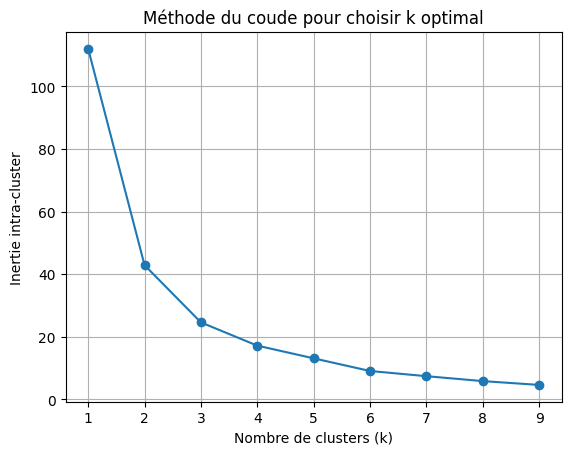

In [45]:
# Vérifiez si X_scaled est déjà défini
if 'X_scaled' not in locals():
    # Exemple de données aléatoires (remplacez cela par vos données réelles)
    X = np.random.rand(100, 5)  # 100 échantillons, 5 caractéristiques
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

# Liste pour stocker les inerties
inertias = []

# Essayer de calculer les inerties pour chaque k
for k in range(1, 10):
    try:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Spécifiez n_init pour éviter l'avertissement
        kmeans.fit(X_scaled)
        inertias.append(kmeans.inertia_)
    except Exception as e:
        print(f"Erreur pour k={k}: {e}")

# Tracer l'inertie en fonction de k
plt.plot(range(1, 10), inertias, marker='o')
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie intra-cluster")
plt.title("Méthode du coude pour choisir k optimal")
plt.grid(True)
plt.show()


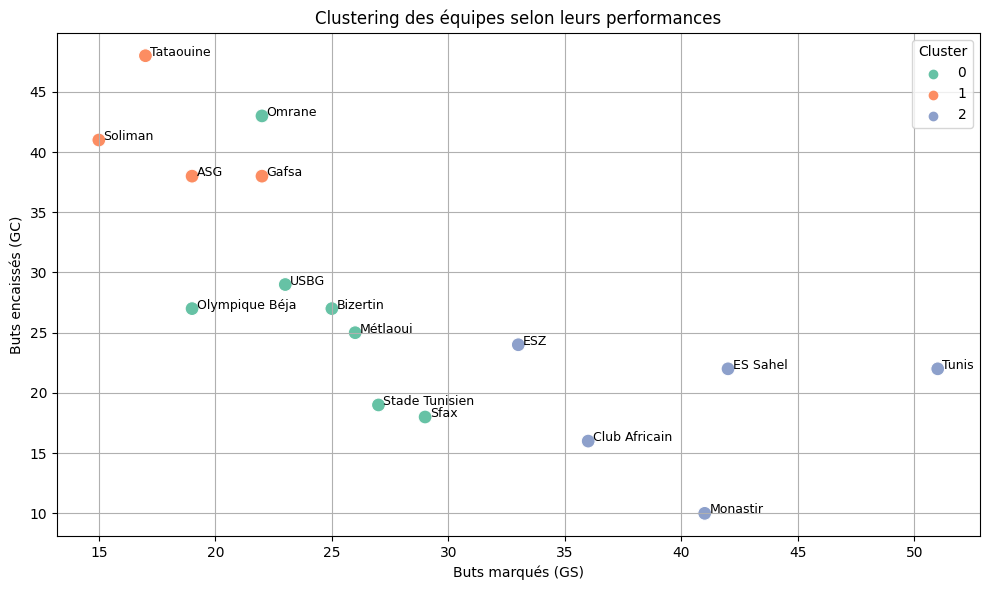

In [43]:
# Assurer que les données sont numériques
cols = ["GS", "GC", "Wins", "Draws", "Loses", "Points", "DiffG"]
df[cols] = df[cols].apply(pd.to_numeric, errors="coerce")

# Supprimer les lignes avec des valeurs manquantes si besoin
df_clean = df.dropna(subset=cols).copy()

# Standardisation des variables pour le clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean[cols])

# Appliquer K-Means avec suppression du warning
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df_clean["Cluster"] = kmeans.fit_predict(X_scaled)

# Affichage du clustering sur un plan 2D (GS vs GC)
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x="GS", y="GC", hue="Cluster", palette="Set2", s=100)
for i in range(df_clean.shape[0]):
    plt.text(df_clean["GS"].iloc[i]+0.2, df_clean["GC"].iloc[i], df_clean["Team"].iloc[i], fontsize=9)
plt.title("Clustering des équipes selon leurs performances")
plt.xlabel("Buts marqués (GS)")
plt.ylabel("Buts encaissés (GC)")
plt.grid(True)
plt.tight_layout()
plt.show()


